imports

In [19]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from support.hyperphoto import HyperPhoto
from support.plots import show_k, plot_cluster_means
from support.functions import kmeans

parameters

In [20]:
# פרמטרים מה-header
width = 800  # עמודות (x)
height = 280  # שורות (y)
bands = 126  # ערוצים (z)
source_path = r'C:\Users\ronsh\Desktop\big_data_for_projects\self_test_rad.img'
dtype = np.int16  # data type = 2
# פרמטרים לניתוח גרפים
range_ = (0, 1000)
bins = 500



import hyper photo

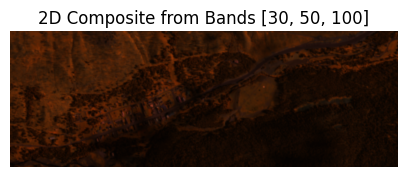

In [21]:
shape = (height,width, bands)

hyperPhoto = HyperPhoto(source_path, shape, np.int16)
hyperPhoto.show([30,50,100])

initial statistics

In [22]:
centroids, labels = kmeans(hyperPhoto.data.reshape(-1, hyperPhoto.data.size(-1)), 5,100000000)


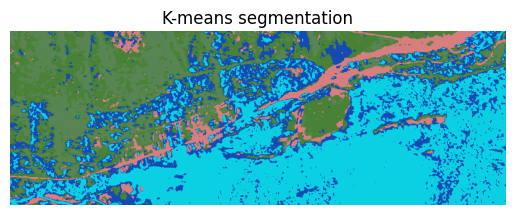

In [23]:
show_k(labels,hyperPhoto.shape[:2])

In [24]:
centroids_n = centroids.abs() / centroids.norm(dim=1, keepdim=True)
X = hyperPhoto.data.reshape(-1,  hyperPhoto.data.size(-1))

error8

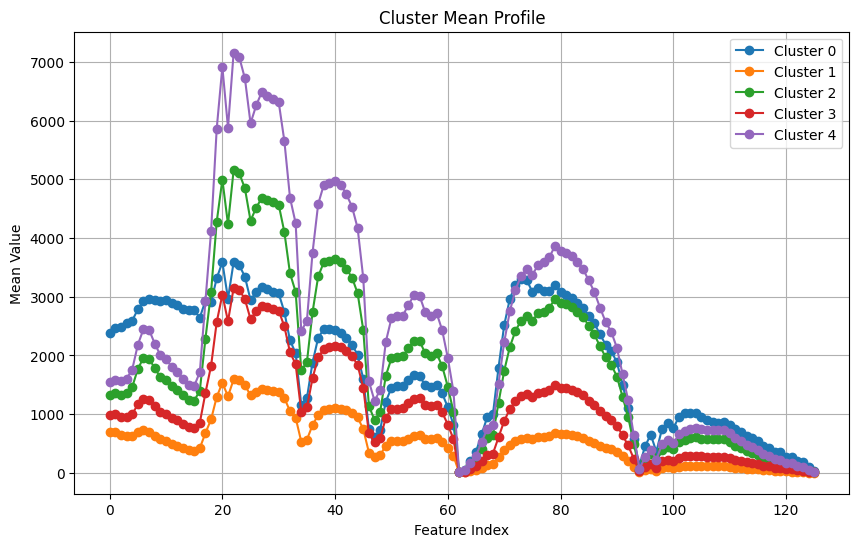

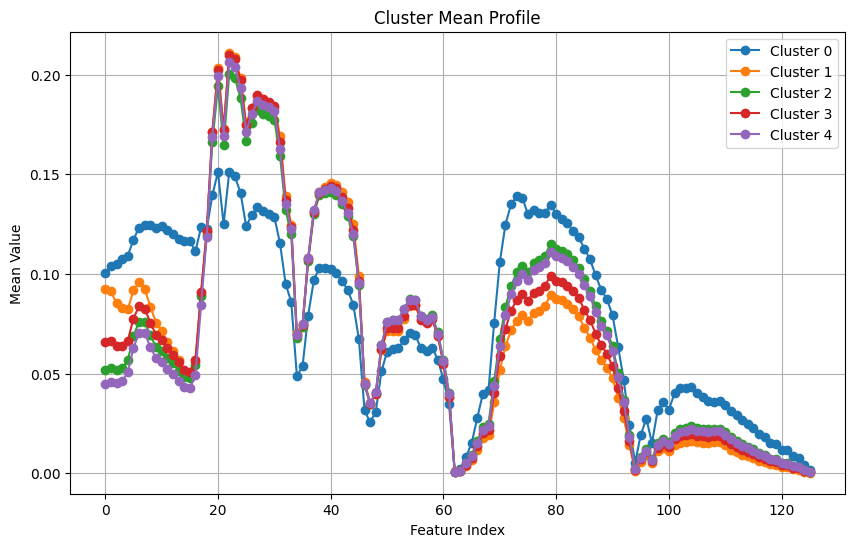

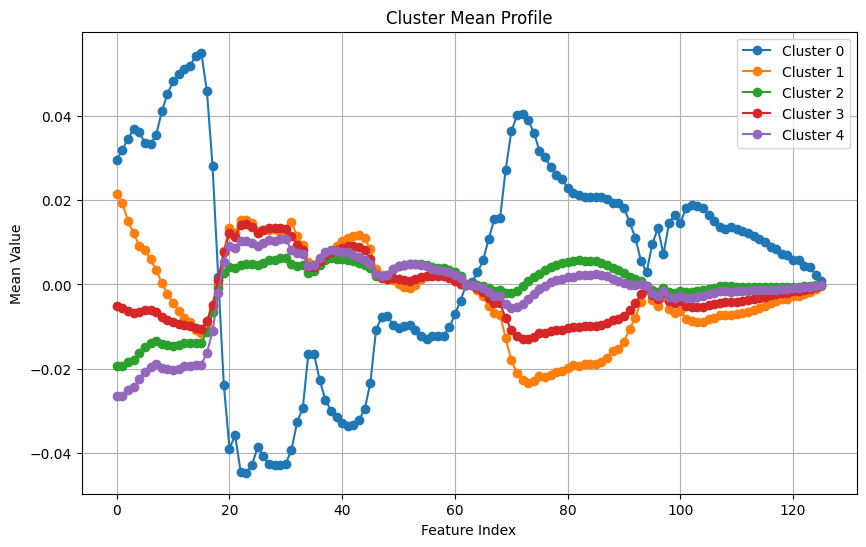

In [36]:
plot_cluster_means(centroids, range(labels.max()+1))
centroids_n = centroids/ centroids.norm(dim=1, keepdim=True)
plot_cluster_means(centroids_n, range(labels.max()+1))
centroids_n = centroids_n - centroids_n.mean(dim=0, keepdim=True)
plot_cluster_means(centroids_n, range(labels.max()+1))
centroids_n = (centroids_n*centroids_n).sum(dim=1)

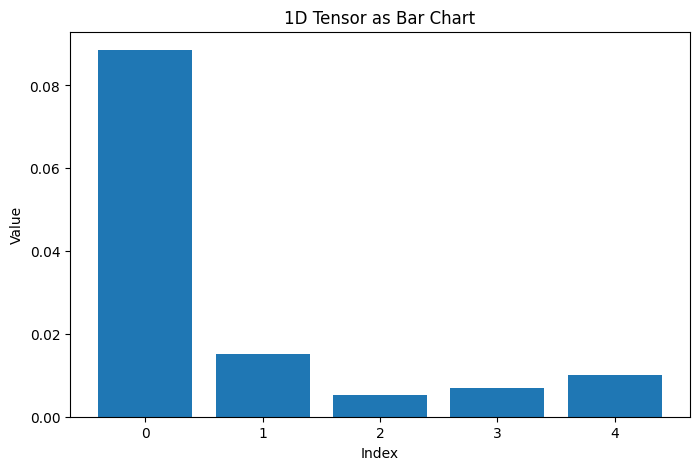

In [37]:
plt.figure(figsize=(8,5))
plt.bar(torch.arange(len(centroids_n)).numpy(), centroids_n.numpy())
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("1D Tensor as Bar Chart")
plt.show()

In [27]:
hyperPhoto.initial_statistics()

init error
torch.Size([280, 800, 126])
init cov
torch.Size([126, 126])


In [28]:
X = hyperPhoto.error8.reshape(-1, hyperPhoto.error8.size(-1))



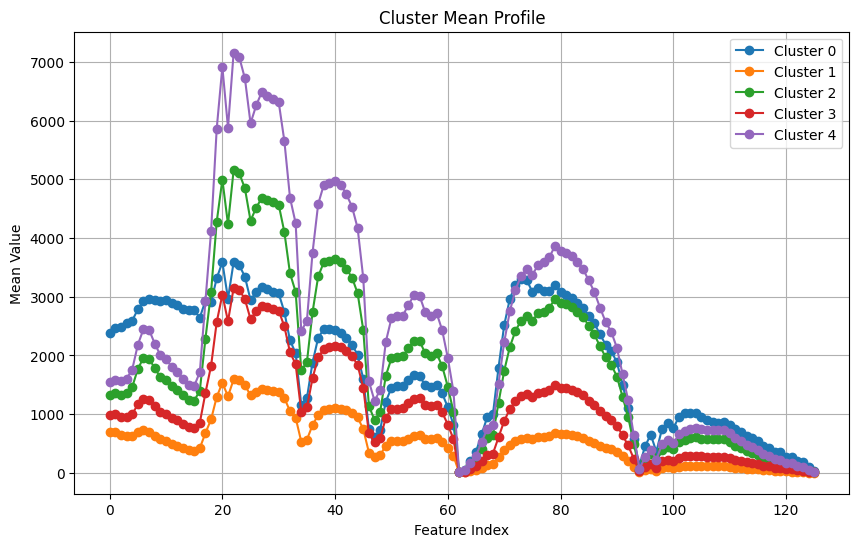

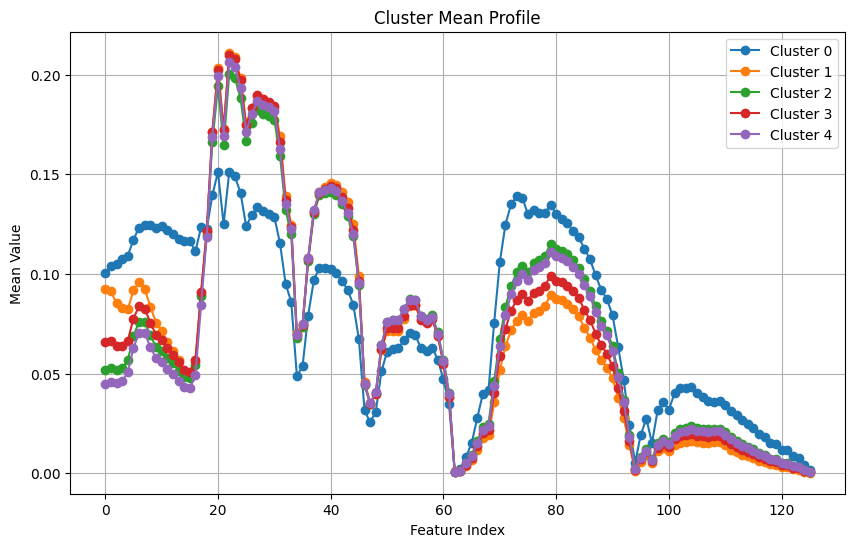

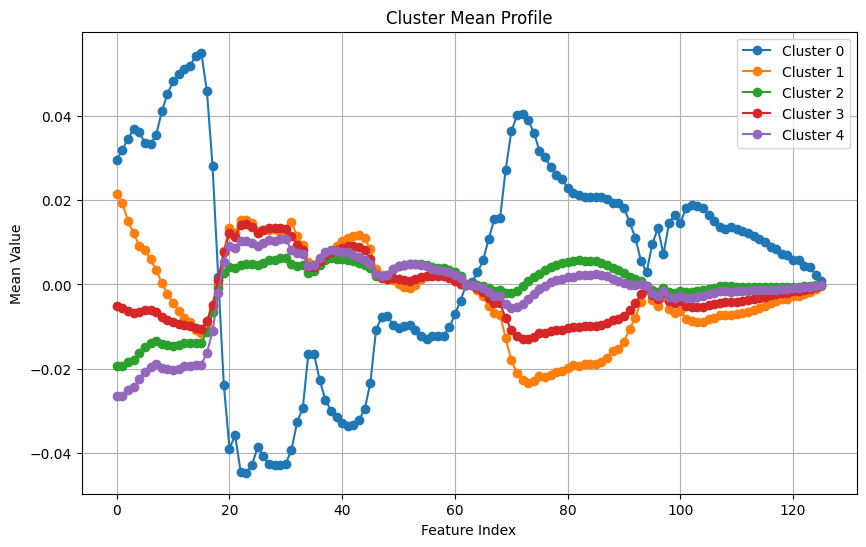

In [29]:
plot_cluster_means(centroids, range(labels.max()+1))
centroids_n = centroids.abs() / centroids.norm(dim=1, keepdim=True)
plot_cluster_means(centroids_n, range(labels.max()+1))
centroids_n = centroids_n - centroids_n.mean(dim=0, keepdim=True)
plot_cluster_means(centroids_n, range(labels.max()+1))
centroids_n = (centroids_n*centroids_n).sum(dim=1)

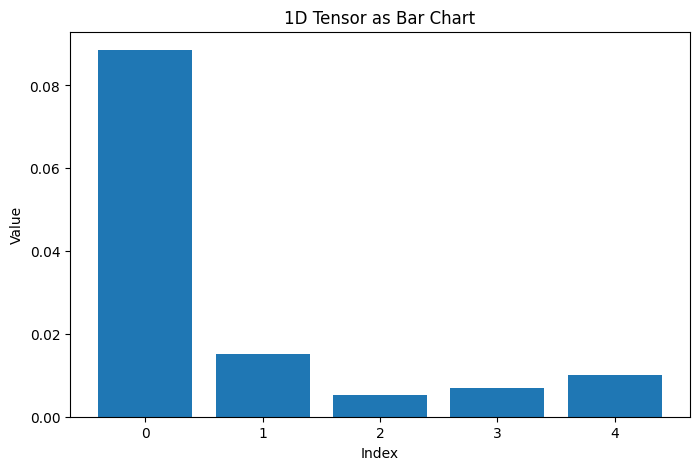

In [30]:
plt.figure(figsize=(8,5))
plt.bar(torch.arange(len(centroids_n)).numpy(), centroids_n.numpy())
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("1D Tensor as Bar Chart")
plt.show()

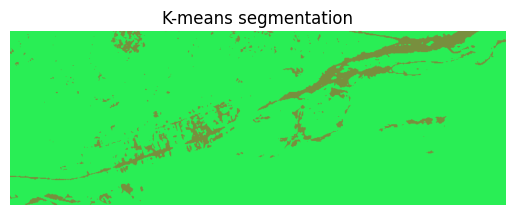

In [31]:
t_index = torch.argmax(centroids_n)
t = centroids[t_index]
show_k((labels==t_index).int(),hyperPhoto.shape[:2])


In [32]:
torch.save(t, "../data/t.pt")

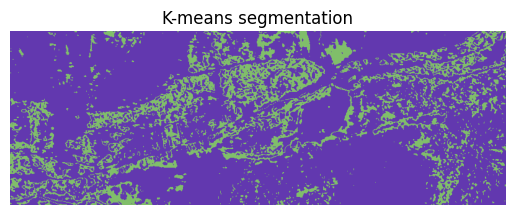

In [33]:
t_index = [6,3,0]

mask =   (labels == 3)
show_k(mask.int(), hyperPhoto.shape[:2])
